# Regression - Real Estate in Rishon Lezion

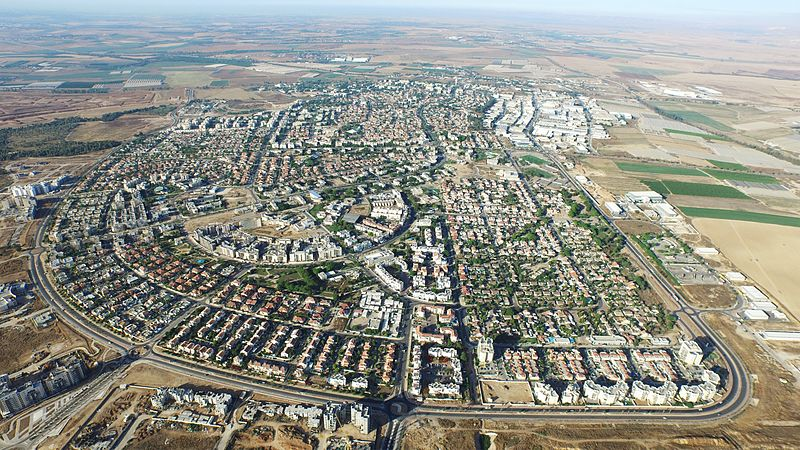

## Main Goal

Predict the price of an apartment (while having the other data).

In [1]:
# Importing the neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

The csv file that we created from web scraping

In [2]:
df = pd.read_csv('C:/Users/matan/Data Science Project/Rishon_Lezion_Nadlan.csv')

In [3]:
df.head()

,index,Year sold,Month sold,Day sold,Street,Street number,Kind,Number of rooms,Floor,Squared meter,Price
0,0,2021,12,20,נירים,3,דירה בבית קומות,6.0,6.0,134.60,3670000
1,1,2021,12,19,קרל נטר,6,דירה בבית קומות,3.0,3.0,81.00,1770000
2,2,2021,12,16,יהודה הלוי,27,דירה בבית קומות,5.0,5.0,120.00,2400000
3,3,2021,12,15,שרירא שמואל,17,דירה בבית קומות,4.0,2.0,64.32,2050000
4,4,2021,12,15,"תרמ""ב",30,דירה בבית קומות,3.0,3.0,80.98,1640000


In [4]:
df

,index,Year sold,Month sold,Day sold,Street,Street number,Kind,Number of rooms,Floor,Squared meter,Price
0,0,2021,12,20,נירים,3,דירה בבית קומות,6.0,6.0,134.60,3670000
1,1,2021,12,19,קרל נטר,6,דירה בבית קומות,3.0,3.0,81.00,1770000
2,2,2021,12,16,יהודה הלוי,27,דירה בבית קומות,5.0,5.0,120.00,2400000
3,3,2021,12,15,שרירא שמואל,17,דירה בבית קומות,4.0,2.0,64.32,2050000
4,4,2021,12,15,"תרמ""ב",30,דירה בבית קומות,3.0,3.0,80.98,1640000
...,...,...,...,...,...,...,...,...,...,...,...
25832,25832,2004,11,8,תורה ועבודה,4,דירה בבית קומות,3.0,4.0,39.00,340000
25833,25833,2004,11,8,הרב נורוק,5,דירה בבית קומות,3.0,2.0,44.00,363000
25834,25834,2004,11,8,סוקולוב,4,דירה בבית קומות,3.0,1.0,68.51,735000
25835,25835,2004,11,8,שרירא שמואל,3,דירה בבית קומות,4.0,3.0,108.00,752000


In [5]:
df.isnull().sum()
# We have no null values,
# That's because we already fixed it the 'Web Scraping' notebook.

index              0
Year sold          0
Month sold         0
Day sold           0
Street             0
Street number      0
Kind               0
Number of rooms    0
Floor              0
Squared meter      0
Price              0
dtype: int64

## Changing from text to numerical

Replace text to integers in column 'Kind' by levels

In [6]:
df["Kind"].replace({"דירה": "1", "דירה בבית קומות": "1"}, inplace=True)
df["Kind"].replace({"דירת גן": "2"}, inplace=True)
df["Kind"].replace({"דירת גג": "3", "דירת גג (פנטהאוז)": "3"}, inplace=True)

Removing the unnecesary columns

In [7]:
df.pop('index')

0            0
1            1
2            2
3            3
4            4
         ...  
25832    25832
25833    25833
25834    25834
25835    25835
25836    25836
Name: index, Length: 25837, dtype: int64

In [8]:
df.head()

,Year sold,Month sold,Day sold,Street,Street number,Kind,Number of rooms,Floor,Squared meter,Price
0,2021,12,20,נירים,3,1,6.0,6.0,134.60,3670000
1,2021,12,19,קרל נטר,6,1,3.0,3.0,81.00,1770000
2,2021,12,16,יהודה הלוי,27,1,5.0,5.0,120.00,2400000
3,2021,12,15,שרירא שמואל,17,1,4.0,2.0,64.32,2050000
4,2021,12,15,"תרמ""ב",30,1,3.0,3.0,80.98,1640000


Description for the columns stats

In [9]:
df.describe()

,Year sold,Month sold,Day sold,Street number,Number of rooms,Floor,Squared meter,Price
count,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,2.583700e+04
mean,2013.780896,6.507528,15.902582,16.123002,3.730332,3.930487,86.165063,1.423444e+06
std,4.599305,3.481454,8.830752,16.884267,0.854577,3.368807,31.706418,1.739804e+06
min,2004.000000,1.000000,1.000000,1.000000,1.000000,0.000000,21.500000,5.000000e+04
25%,2010.000000,3.000000,8.000000,5.000000,3.000000,2.000000,66.300000,1.000000e+06
50%,2014.000000,6.000000,16.000000,10.000000,4.000000,3.000000,83.220000,1.350000e+06
75%,2018.000000,10.000000,24.000000,21.000000,4.000000,5.000000,100.470000,1.700000e+06
max,2021.000000,12.000000,31.000000,129.000000,9.000000,26.000000,1950.000000,2.000000e+08


## Basic ploting

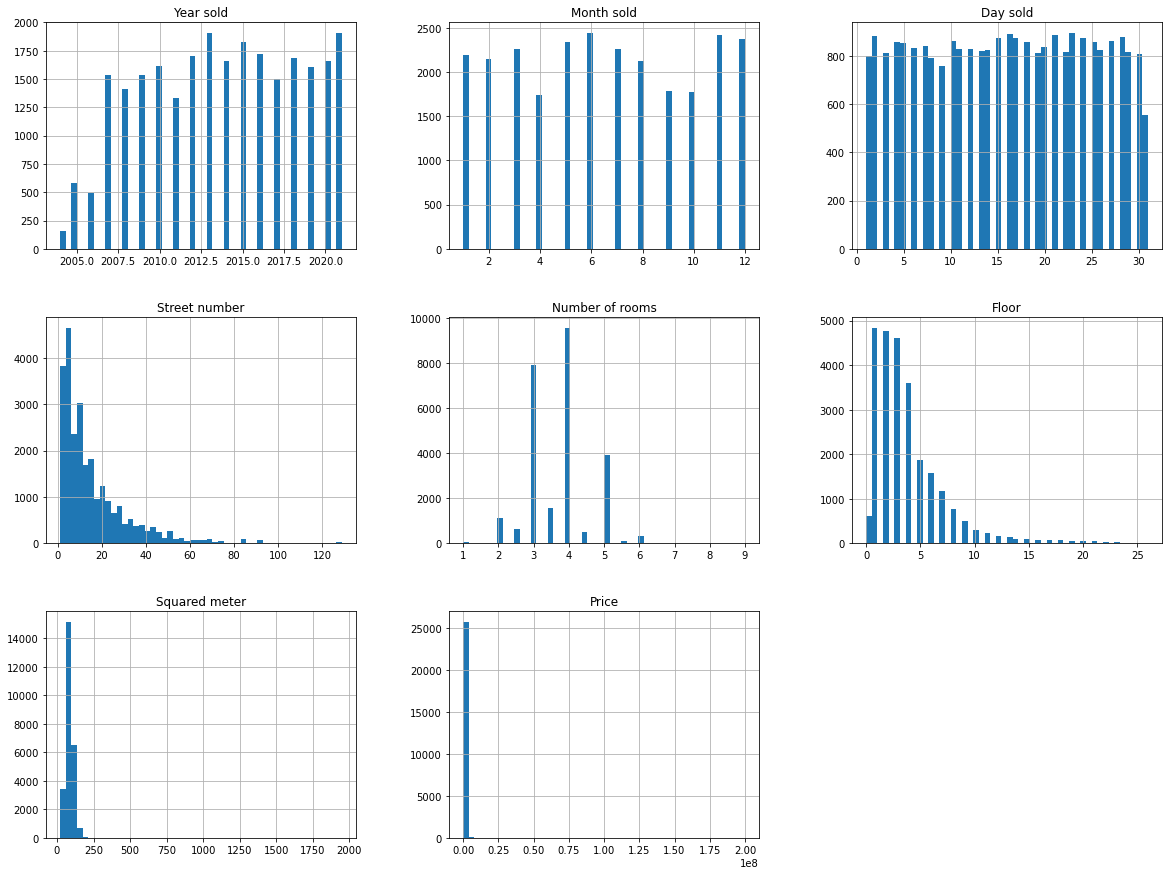

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Cleaning outliers

In [11]:
df = df.loc[df['Year sold'] >= 2005]
df = df.loc[df['Floor'] < 10]
df = df.loc[(df['Number of rooms'] >= 2) & (df['Number of rooms'] <= 5)]
df = df.loc[df['Squared meter'] < 250]
df = df.loc[df['Price'] < 10000000]
df = df.loc[df['Street number'] < 40]

Ploting again to check if there are more specific outliers

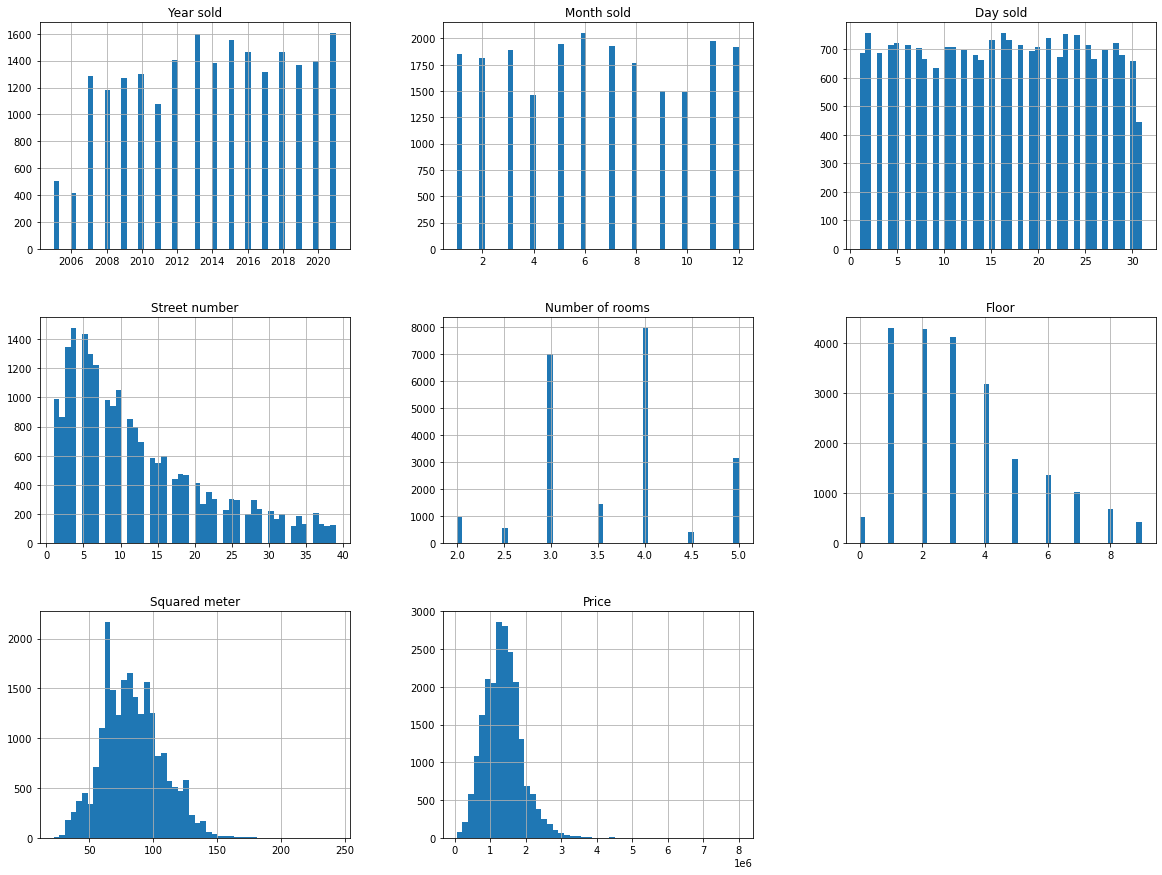

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Cleaning outliers again (more specific)

In [13]:
df = df.loc[(df['Squared meter'] <= 150) & (df['Squared meter'] >= 25)] 
df = df.loc[df['Price'] < 3000000]

## Correlation matrix

From here we can see which columns are more correlated to the 'Price' column, and which columns aren't.

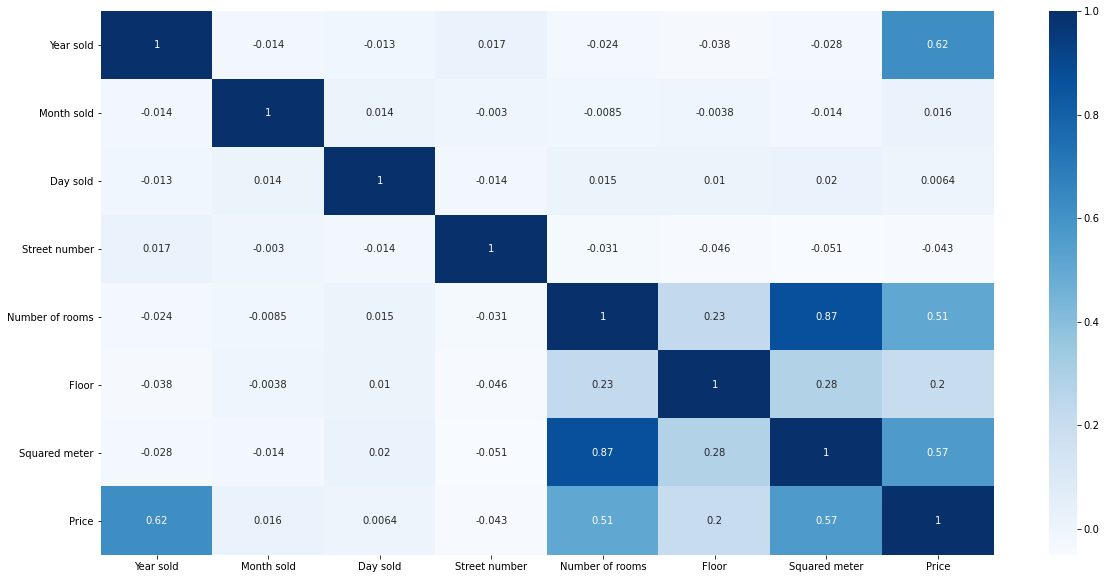

In [27]:
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr(), cmap = 'Blues', annot=True);

from the heatmp we can see that the 'Month sold', 'Day sold' and 'Street number' columns are not correlated to the 'Price' column.

In [28]:
# deleting those columns
df.pop('Month sold')
df.pop('Day sold')
df.pop('Street number')

1         6
2        27
3        17
4        30
5        14
         ..
25675     8
25676    25
25677    15
25678     6
25679    28
Name: Street number, Length: 21366, dtype: int64

In [29]:
df.describe()

,Year sold,Number of rooms,Floor,Squared meter,Price
count,21366.000000,21366.000000,21366.000000,21366.000000,2.136600e+04
mean,2013.863568,3.655855,3.275204,83.075782,1.339458e+06
std,4.552522,0.781470,2.088917,22.683524,4.943030e+05
min,2005.000000,2.000000,0.000000,26.100000,5.000000e+04
25%,2010.000000,3.000000,2.000000,65.690000,9.850000e+05
50%,2014.000000,4.000000,3.000000,81.540000,1.330000e+06
75%,2018.000000,4.000000,4.000000,98.000000,1.650000e+06
max,2021.000000,5.000000,9.000000,150.000000,2.999000e+06


Note: we checked several options,

The best of them was the one with 'get_dummies' function on the 'Street' column.

In [30]:
df_with_street_dummies = pd.get_dummies(df, columns = ['Street'], prefix = '', prefix_sep = '')

In [31]:
df_with_street_dummies.head()

,Year sold,Kind,Number of rooms,Floor,Squared meter,Price,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
1,2021,1,3.0,3.0,81.00,1770000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,1,5.0,5.0,120.00,2400000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,1,4.0,2.0,64.32,2050000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2021,1,3.0,3.0,80.98,1640000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2021,1,4.0,2.0,86.44,1710000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Spliting the data into train and test parts

In [32]:
prices = df_with_street_dummies['Price']
data_without_prices = df_with_street_dummies.drop(['Price'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(data_without_prices, prices, test_size=0.2, random_state = 7)

In [33]:
X_train

,Year sold,Kind,Number of rooms,Floor,Squared meter,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,אברבנאל,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
15940,2012,1,5.0,7.0,130.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9211,2016,1,4.0,1.0,104.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2313,2020,1,4.0,1.0,71.72,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,2021,1,5.0,7.0,116.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9751,2016,1,4.0,7.0,94.97,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2021,1,4.0,6.0,102.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24878,2006,1,4.0,7.0,96.43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6810,2018,1,3.0,0.0,72.89,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12781,2014,1,3.0,4.0,48.63,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X_train.describe()

15940    2150000
9211     1710000
2313     1690000
928      2700000
9751     1830000
          ...   
1110     1950000
24878     861000
6810     1760000
12781     600000
20373     860000
Name: Price, Length: 17092, dtype: int64

### Train plot 

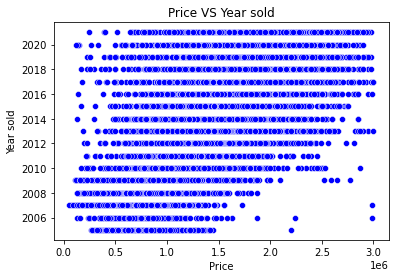

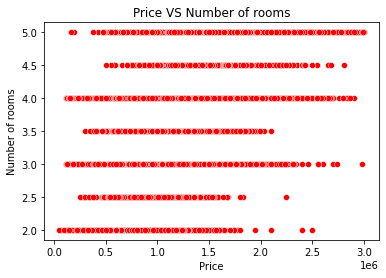

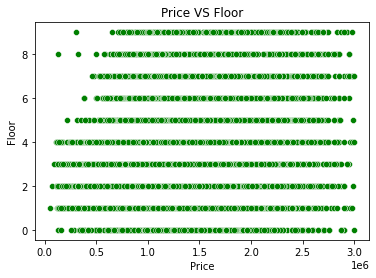

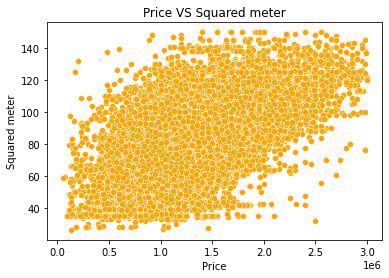

In [36]:
sb.scatterplot(x = y_train, y = X_train['Year sold'], color='blue')
plt.title("Price VS Year sold")
plt.show()

sb.scatterplot(x = y_train, y = X_train['Number of rooms'], color='red')
plt.title("Price VS Number of rooms")
plt.show()

sb.scatterplot(x = y_train, y = X_train['Floor'], color='green')
plt.title("Price VS Floor")
plt.show()

sb.scatterplot(x = y_train, y = X_train['Squared meter'], color='orange')
plt.title("Price VS Squared meter")
plt.show()

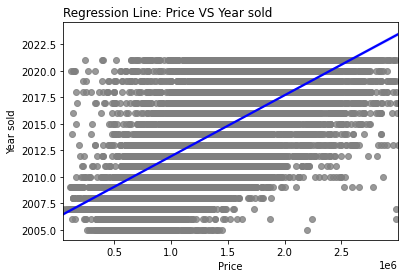

In [37]:
ax = sb.regplot(x=y_train, y=X_train["Year sold"], fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line: Price VS Year sold", color="black", loc='left');

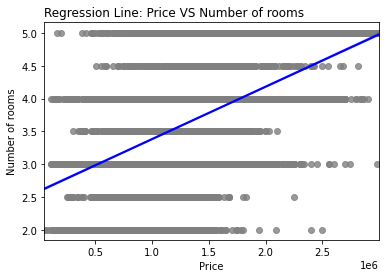

In [41]:
ax = sb.regplot(x=y_train, y=X_train["Number of rooms"], fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line: Price VS Number of rooms", color="black", loc='left');

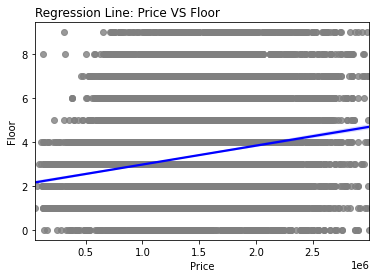

In [42]:
ax = sb.regplot(x=y_train, y=X_train["Floor"], fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line: Price VS Floor", color="black", loc='left');

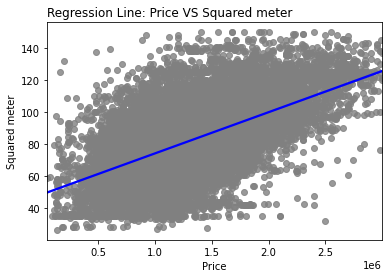

In [43]:
ax = sb.regplot(x=y_train, y=X_train["Squared meter"], fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line: Price VS Squared meter", color="black", loc='left');

As we can see from the above, the 'Floor' has the minimum impact on the 'Price'.

while the others has much more impact on the apartment price.

### Normalization 

In [44]:
num_features = ['Year sold', 'Number of rooms', 'Floor', 'Squared meter']
basic_scale = MinMaxScaler()
X_train[num_features] = basic_scale.fit_transform(X_train[num_features])
X_test[num_features] = basic_scale.transform(X_test[num_features])

### Models

#### Dummy Regressor

##### 1) Median approach

In [46]:
dummy_reg_by_median = DummyRegressor(strategy="median")
dummy_reg_by_median.fit(X_train, y_train)
pred = dummy_reg_by_median.predict(X_test)
dummy_median_err = mean_squared_error(y_test,dummy_reg_by_median.predict(X_test), squared=False)

print("score: ",dummy_reg_by_median.score(X_test, y_test))
print("r^2 score: ",metrics.r2_score(y_test, pred))
print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print ("RMSE: ",dummy_median_err)

r^2 Score:  -9.883131014842839e-05
MAE:  389532.4178755264
RMSE:  491938.5840068451


##### 2) Mean approach

In [47]:
dummy_reg_by_mean = DummyRegressor(strategy="mean")
dummy_reg_by_mean.fit(X_train, y_train)
pred = dummy_reg_by_mean.predict(X_test)
dummy_mean_err = mean_squared_error(y_test,dummy_reg_by_mean.predict(X_test), squared=False)

print("score: ",dummy_reg_by_mean.score(X_test, y_test))
print("r^2 score: ",metrics.r2_score(y_test, pred))
print("MAE: ", metrics.mean_absolute_error(y_test, pred))  
print ("RMSE: ",dummy_mean_err)

r^2 Score:  -0.00013471780075136053
MAE:  389788.9408190485
RMSE:  491947.41003006074


#### Linear Regression

In [48]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
pred = linear_reg.predict(X_test)
linear_reg_err = mean_squared_error(y_test,pred)

print("score: ",linear_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_test, pred))
print ("RMSE: ",linear_reg_err)

score:  -9.874999733220616e+22
r^2 score:  -9.874999733220616e+22
MAE:  2684939005696833.0
MSE:  2.389549031219283e+34


In [50]:
# Cross validation
linear_reg_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10,scoring="neg_mean_squared_error")
linear_reg_scores_r2 = cross_val_score(LinearRegression(),X_train, y_train,cv=10,scoring="r2")
linear_reg_pred = cross_val_predict(LinearRegression(), X_train, y_train, cv=10)

print("After cross validation\n")
print("r^2 score:",linear_reg_scores_r2.mean())
print("MAE: ",metrics.mean_absolute_error(y_test, linear_reg_pred))
print ("RMSE:",np.sqrt(-linear_reg_scores.mean()))

After cross validation

r^2 Score: -3.204282718852658e+23
MSE: 2.806954290379208e+17


#### KNN Regressor

In [52]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
pred = knn_reg.predict(X_test)
knn_reg_err = mean_squared_error(y_test,pred)

print("score: ",knn_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_test, pred))
print ("RMSE: ",knn_reg_err)

score:  0.7806338386656573
r^2 score:  0.7806338386656573
MAE:  161464.3177819373
MSE:  53082148097.21462


In [53]:
# Cross validation
knn_reg_scores = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
knn_reg_scores_r2 = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train, y_train, cv=10, scoring="r2")
knn_reg_pred = cross_val_predict(KNeighborsRegressor(n_neighbors=10), X_train, y_train, cv=10)

print("After cross validation\n")
print("R2 Score:",knn_reg_scores_r2.mean())
print("MAE: ",metrics.mean_absolute_error(y_test, knn_reg_pred))
print ("RMSE:",np.sqrt(-knn_reg_scores.mean()))

After cross validation

R2 Score: 0.7369831824071466
RMSE: 253710.32289416806


#### Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)
log_reg_err = mean_squared_error(y_test,pred)

print("score: ",log_reg.score(X_test, y_test))
print("r^2 score: ",metrics.r2_score(y_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_test, pred))
print ("RMSE: ",log_reg_err)

In [ ]:
# Cross validation
log_reg_scores = cross_val_score(LogisticRegression(),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
log_reg_scores_r2 = cross_val_score(LogisticRegression(),X_train, y_train, cv=10, scoring="r2")
log_reg_pred = cross_val_predict(LogisticRegression(), X_train, y_train, cv=10)

print("After cross validation\n")
print("r^2 Score:",log_reg_scores_r2.mean())
print("MAE: ",metrics.mean_absolute_error(y_test, log_reg_pred))
print ("Mean Square ERR:",np.sqrt(-log_reg_scores.mean()))

#### Random Forest

In [54]:
rf_reg = RandomForestRegressor(random_state=7)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)
rf_reg_err = mean_squared_error(y_test,pred)

print("score: ",rf_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_test, pred))
print ("MSE: ",rf_reg_err)

score:  0.812461763869217
r^2 score:  0.812461763869217
MAE:  140317.9437595788
MSE:  45380437728.551994


In [55]:
# Cross validation
rf_reg_scores = cross_val_score(RandomForestRegressor(random_state=7),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
rf_reg_scores_r2 = cross_val_score(RandomForestRegressor(random_state=7),X_train, y_train, cv=10, scoring="r2")
rf_reg_pred = cross_val_predict(RandomForestRegressor(random_state=7), X_train, y_train, cv=10)

print("After cross validation\n")
print("R2 Score:",rf_reg_scores_r2.mean())
print("MAE: ",metrics.mean_absolute_error(y_test, rf_reg_pred))
print ("Mean Square ERR:",np.sqrt(-rf_reg_scores.mean()))

After cross validation

R2 Score: 0.8040054478038352
Mean Square ERR: 218958.3388401442


## HyperParameters Tuning

For improvment, we will use RandomSearchCV on our best model.

Note: we tried the GridSearchCV approach, but it took us an infinite time to run that...

In [ ]:
# number of trees in random forest
n_estimators_list = [100, 500, 1000, 3000]
# number of features to consider at every split
max_features_list = np.arange(0.01,0.2,0.01)
# maximum number of levels in tree
max_depth_list = [2,8,None]
# number of samples
max_samples_list = [0.5,0.75,1.0]
# criterions
criterion_list = ['gini','entropy']
params = {'n_estimators':n_estimators_list,
          'max_features':max_features_list,
          'max_depth':max_depth_list,
          'max_samples':max_samples_list,
          'criterion':criterion_list}
rs_model = RandomizedSearchCV(estimator = RandomForestRegressor(random_state=7),
                              param_distributions = params,
                              n_jobs = -1,
                              n_iter = 30,
                              cv = 10)
# fitting the training part
rs_model.fit(X_train, y_train)

In [ ]:
# The best parameters
best_parameters = rs_model.best_params_
print(best_parameters)

In [ ]:
# The best score
best_score = rs_model.best_score_
print("score: ",best_score)

# Conclusion

## Models score 

In [ ]:
print("Dummy Regressor (by median): ",dummy_median_err," RMSE")
print("Dummy Regressor (by mean): ",dummy_mean_err," RMSE")
print("Linear Regression: ",linear_reg_err," RMSE")
print("KNN Regressor: ",knn_reg_err," RMSE")
print("Logistic Regressor: ",log_reg_err," RMSE")
print("Random Forest Regressor: ",rf_reg_err," RMSE")

The best model (between the models that we checked) for our dataset is: **Random Forest Reggresor**

After a RandomizedSearchCV we improved it and got the best HyperParameters.

Our best score is: .